In [70]:
import pandas as pd
import numpy as np


In [71]:
df = pd.read_csv('../../data/processed/data.csv')

In [72]:
df.head(3)

,end_of_period,total_assets,non_current_assets,current_assets,property_plant_equipment,intangible_assets,inventories,trade_receivables,cash_and_cash_equivalents,equity_shareholders_of_the_parent,share_capital,retained_earning_accumulated_losses,non_current_liabilities,current_liabilities,non_current_loans_and_borrowings,financial_liabilities_loans_borrowings,total_shares,file_name,ticker,target
0,2011-03-01,1342.0,86.0,1256.0,0.0,0.0,0.0,0.0,0.0,1221.0,0.0,0.0,0.0,110.0,0.0,0.0,1870.76,11BIT.xlsx,11B,7.54
1,2011-06-01,1659.0,103.0,1556.0,0.0,0.0,0.0,0.0,0.0,1595.0,0.0,0.0,0.0,64.0,0.0,0.0,1870.76,11BIT.xlsx,11B,24.00
2,2011-09-01,2141.0,85.0,2055.0,0.0,0.0,0.0,0.0,0.0,2060.0,0.0,0.0,0.0,81.0,0.0,0.0,1870.76,11BIT.xlsx,11B,14.95


max number of rows that can occur: 99

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15495 entries, 0 to 15494
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   end_of_period                           15495 non-null  object 
 1   total_assets                            15495 non-null  float64
 2   non_current_assets                      15495 non-null  float64
 3   current_assets                          15495 non-null  float64
 4   property_plant_equipment                15495 non-null  float64
 5   intangible_assets                       15495 non-null  float64
 6   inventories                             15495 non-null  float64
 7   trade_receivables                       15495 non-null  float64
 8   cash_and_cash_equivalents               15495 non-null  float64
 9   equity_shareholders_of_the_parent       15495 non-null  float64
 10  share_capital                           15495 non-null  fl

In [74]:
df.shape

(15495, 20)

In [75]:
num_unique_tickers = df['ticker'].nunique()
print(f"Number of unique tickers: {num_unique_tickers}")

print('\n')

unique_tickers = df['ticker'].unique()
print(unique_tickers)

Number of unique tickers: 303


['11B' '3RG' 'ABE' 'ABS' 'ACG' 'ACP' 'ACT' 'ADV' 'AGO' 'AGT' 'ALG' 'ALL'
 'AMB' 'AMC' 'AML' 'ANR' 'APE' 'APL' 'APN' 'APR' 'APT' 'ARR' 'ART' 'ASB'
 'ASE' 'ASM' 'ATC' 'ATD' 'ATG' 'ATP' 'ATR' 'ATT' 'AWM' 'B24' 'BAH' 'BBT'
 'BCM' 'BCS' 'BCX' 'BDX' 'BDZ' 'BFT' 'BIO' 'BIP' 'BMC' 'BMX' 'BOW' 'BRA'
 'BRG' 'BRS' 'CAR' 'CCC' 'CDL' 'CDR' 'CEZ' 'CFI' 'CIE' 'CIG' 'CLN' 'CMP'
 'CMR' 'CNT' 'COG' 'CPL' 'CPR' 'CPS' 'CRI' 'CRJ' 'CRM' 'CTS' 'CTX' 'DAD'
 'DAT' 'DBC' 'DCR' 'DEK' 'DEL' 'DIG' 'DNP' 'DOM' 'DPL' 'DTR' 'EAH' 'EAT'
 'EDI' 'EEX' 'EFK' 'ELT' 'ELZ' 'EMC' 'ENA' 'ENE' 'ENG' 'ENI' 'ENP' 'ENT'
 'ERB' 'ERG' 'ETL' 'EUR' 'FEE' 'FER' 'FRO' 'FSG' 'FTE' 'GIF' 'GIG' 'GOB'
 'GOP' 'GPP' 'GRN' 'HDR' 'HEL' 'HLD' 'HRP' 'HRS' 'HUG' 'ICE' 'IFI' 'IFR'
 'IMC' 'IMS' 'INK' 'INL' 'IPO' 'IRL' 'ITB' 'IZB' 'IZO' 'IZS' 'JSW' 'JWW'
 'KCH' 'KCI' 'KDM' 'KER' 'KGH' 'KGL' 'KGN' 'KMP' 'KOM' 'KPD' 'KPL' 'KRK'
 'KTY' 'KVT' 'LAB' 'LBT' 'LBW' 'LEN' 'LES' 'LPP' 'LRK' 'LRQ' 'LSI' 'LTX'
 'LWB' 'MAB' 'MAK' 

In [76]:
ticker_counts = df['ticker'].value_counts()

print("\nSummary statistics:")
print(f"Maximum entries for a ticker: {ticker_counts.max()}")
print(f"Minimum entries for a ticker: {ticker_counts.min()}")
print(f"Average entries per ticker: {ticker_counts.mean():.2f}")
print(f"Median entries per ticker: {ticker_counts.median():.2f}")


Summary statistics:
Maximum entries for a ticker: 99
Minimum entries for a ticker: 1
Average entries per ticker: 51.14
Median entries per ticker: 50.00


In [77]:
# Drop tickers that are insufficient

tickers_to_drop = ['AGT', 'ANR', 'ASB', 'BBT', 'BCS', 'BCX', 'CRI', 'CRJ', 'CTS', 'CTX', 'DAD',
                  'DNP', 'GIF', 'GOP', 'GPP', 'HLD', 'HUG', 'ICE', 'IMC', 'KDM', 'KER', 'MLK',
                  'MLS', 'MOC', 'NNG', 'NTU', 'OND', 'PCF', 'PTG', 'PUR', 'SFG', 'SHO', 'SIM',
                  'SLV', 'SLZ', 'SPH', 'SPR', 'STH', 'SVRS', 'TEN', 'TMR', 'TXM', 'VRC']


df = df[~df['ticker'].isin(tickers_to_drop)]


df['end_of_period'] = df['end_of_period'].astype('datetime64[ns]')
cutoff_date = pd.to_datetime('2022-07-01')
df = df[df['end_of_period'] <= cutoff_date]

In [78]:
def fill_missing_quarters(df):
   new_rows = []

   for ticker in df['ticker'].unique():
       ticker_data = df[df['ticker'] == ticker]

       ticker_data = ticker_data.sort_values('end_of_period')

       first_date = ticker_data['end_of_period'].min()
       last_date = ticker_data['end_of_period'].max()

       day_of_month = ticker_data['end_of_period'].dt.day.mode()[0]

       all_quarters = []
       current_date = first_date

       while current_date <= last_date:
           all_quarters.append(current_date)
           year = current_date.year + (current_date.month + 3) // 12
           month = (current_date.month + 3 - 1) % 12 + 1
           current_date = pd.Timestamp(year=year, month=month, day=day_of_month)

       existing_dates = set(ticker_data['end_of_period'])
       all_quarters_set = set(all_quarters)
       missing_dates = all_quarters_set - existing_dates

       for missing_date in missing_dates:
           new_row = {'ticker': ticker, 'end_of_period': missing_date}
           new_rows.append(new_row)

   if new_rows:
       missing_df = pd.DataFrame(new_rows)

       for col in df.columns:
           if col not in ['ticker', 'end_of_period']:
               missing_df[col] = np.nan

       result_df = pd.concat([df, missing_df], ignore_index=True)
       result_df = result_df.sort_values(['ticker', 'end_of_period'])

       return result_df

   return df


df = fill_missing_quarters(df)

In [79]:
df.isnull().sum()

end_of_period                               0
total_assets                              412
non_current_assets                        412
current_assets                            412
property_plant_equipment                  412
intangible_assets                         412
inventories                               412
trade_receivables                         412
cash_and_cash_equivalents                 412
equity_shareholders_of_the_parent         412
share_capital                             412
retained_earning_accumulated_losses       412
non_current_liabilities                   412
current_liabilities                       412
non_current_loans_and_borrowings          412
financial_liabilities_loans_borrowings    412
total_shares                              412
file_name                                 412
ticker                                      0
target                                    412
dtype: int64

In [80]:
df.head(10)

,end_of_period,total_assets,non_current_assets,current_assets,property_plant_equipment,intangible_assets,inventories,trade_receivables,cash_and_cash_equivalents,equity_shareholders_of_the_parent,share_capital,retained_earning_accumulated_losses,non_current_liabilities,current_liabilities,non_current_loans_and_borrowings,financial_liabilities_loans_borrowings,total_shares,file_name,ticker,target
0,2011-03-01,1342.00,86.00,1256.00,0.00,0.00,0.00,0.00,0.00,1221.00,0.00,0.00,0.0,110.00,0.0,0.00,1870.76,11BIT.xlsx,11B,7.54
1,2011-06-01,1659.00,103.00,1556.00,0.00,0.00,0.00,0.00,0.00,1595.00,0.00,0.00,0.0,64.00,0.0,0.00,1870.76,11BIT.xlsx,11B,24.00
2,2011-09-01,2141.00,85.00,2055.00,0.00,0.00,0.00,0.00,0.00,2060.00,0.00,0.00,0.0,81.00,0.0,0.00,1870.76,11BIT.xlsx,11B,14.95
3,2011-12-01,2986.19,86.87,2899.31,0.00,53.73,1109.49,418.50,1299.40,2560.98,187.08,1061.58,0.0,425.22,0.0,0.00,1870.76,11BIT.xlsx,11B,7.15
4,2012-03-01,3473.00,51.00,3422.00,0.00,0.00,0.00,0.00,0.00,3259.00,191.00,0.00,0.0,76.00,0.0,0.00,1911.70,11BIT.xlsx,11B,9.83
5,2012-06-01,3428.00,49.00,3379.00,0.00,0.00,0.00,231.00,1604.00,3217.00,0.00,0.00,0.0,74.00,0.0,0.00,1911.70,11BIT.xlsx,11B,10.51
6,2012-09-01,6384.00,48.00,6336.00,0.00,0.00,0.00,0.00,0.00,6137.00,0.00,0.00,0.0,93.00,0.0,0.00,2217.20,11BIT.xlsx,11B,9.31
7,2012-12-01,7336.53,95.45,7240.68,7.18,29.85,2558.44,1178.29,3465.90,6913.93,221.72,1344.70,0.0,422.36,0.0,-0.62,2217.20,11BIT.xlsx,11B,8.62
8,2013-03-01,7410.16,82.35,7327.81,5.91,23.88,2895.94,392.60,4034.73,6971.11,221.72,1401.87,0.0,439.05,0.0,0.00,2217.20,11BIT.xlsx,11B,8.52
9,2013-06-01,7740.99,567.13,7173.87,4.64,507.73,2792.80,561.13,3816.39,7312.28,221.72,398.35,0.0,428.71,0.0,0.00,2217.20,11BIT.xlsx,11B,11.37


In [81]:
df_stooq = pd.read_csv('../../data/processed/stooq_data.csv')

In [82]:
df_stooq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594620 entries, 0 to 1594619
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   TICKER   1594620 non-null  object 
 1   PER      1594620 non-null  object 
 2   DATE     1594620 non-null  object 
 3   TIME     1594620 non-null  int64  
 4   OPEN     1594620 non-null  float64
 5   HIGH     1594620 non-null  float64
 6   LOW      1594620 non-null  float64
 7   CLOSE    1594620 non-null  float64
 8   VOL      1594620 non-null  float64
 9   OPENINT  1594620 non-null  int64  
 10  target   1594620 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 133.8+ MB


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15528 entries, 0 to 15115
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   end_of_period                           15528 non-null  datetime64[ns]
 1   total_assets                            15116 non-null  float64       
 2   non_current_assets                      15116 non-null  float64       
 3   current_assets                          15116 non-null  float64       
 4   property_plant_equipment                15116 non-null  float64       
 5   intangible_assets                       15116 non-null  float64       
 6   inventories                             15116 non-null  float64       
 7   trade_receivables                       15116 non-null  float64       
 8   cash_and_cash_equivalents               15116 non-null  float64       
 9   equity_shareholders_of_the_parent       15116 non-null 

In [84]:
import pandas as pd


def update_null_targets(df, df_stooq, tolerance_days=7):
    result_df = df.copy()

    if result_df['end_of_period'].dtype != 'datetime64[ns]':
        result_df['end_of_period'] = pd.to_datetime(result_df['end_of_period'])

    df_stooq_prep = df_stooq.copy()
    df_stooq_prep['DATE'] = pd.to_datetime(df_stooq_prep['DATE'])
    df_stooq_prep = df_stooq_prep.rename(columns={
        'TICKER': 'ticker',
        'DATE': 'end_of_period',
    })

    null_target_rows = result_df[result_df['target'].isna()].copy()

    if len(null_target_rows) == 0:
        return result_df

    merged_groups = []

    for ticker, group in null_target_rows.groupby('ticker'):
        group = group.sort_values('end_of_period')

        stooq_group = df_stooq_prep[df_stooq_prep['ticker'] == ticker].sort_values('end_of_period')

        if stooq_group.empty:
            merged_groups.append(group)
            continue

        stooq_group = stooq_group[['ticker', 'end_of_period', 'target']]

        try:
            merged = pd.merge_asof(
                group,
                stooq_group,
                on='end_of_period',
                by='ticker',
                direction='nearest',
                tolerance=pd.Timedelta(days=tolerance_days),
                suffixes=('', '_stooq')
            )

            if 'target_stooq' in merged.columns:
                merged['target'] = merged['target_stooq'].combine_first(merged['target'])
                merged = merged.drop('target_stooq', axis=1)

            merged_groups.append(merged)

        except Exception as e:
            merged_groups.append(group)

    updated_rows = pd.concat(merged_groups, ignore_index=True) if merged_groups else pd.DataFrame()

    if not updated_rows.empty:
        non_null_rows = result_df[~result_df['target'].isna()].copy()
        result_df = pd.concat([non_null_rows, updated_rows], ignore_index=True)
        result_df = result_df.sort_values(['ticker', 'end_of_period'])

    return result_df

In [85]:
df = update_null_targets(df, df_stooq, tolerance_days=7)

In [86]:
df.isnull().sum()

end_of_period                               0
total_assets                              412
non_current_assets                        412
current_assets                            412
property_plant_equipment                  412
intangible_assets                         412
inventories                               412
trade_receivables                         412
cash_and_cash_equivalents                 412
equity_shareholders_of_the_parent         412
share_capital                             412
retained_earning_accumulated_losses       412
non_current_liabilities                   412
current_liabilities                       412
non_current_loans_and_borrowings          412
financial_liabilities_loans_borrowings    412
total_shares                              412
file_name                                 412
ticker                                      0
target                                     29
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15528 entries, 0 to 15115
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   end_of_period                           15528 non-null  datetime64[ns]
 1   total_assets                            15116 non-null  float64       
 2   non_current_assets                      15116 non-null  float64       
 3   current_assets                          15116 non-null  float64       
 4   property_plant_equipment                15116 non-null  float64       
 5   intangible_assets                       15116 non-null  float64       
 6   inventories                             15116 non-null  float64       
 7   trade_receivables                       15116 non-null  float64       
 8   cash_and_cash_equivalents               15116 non-null  float64       
 9   equity_shareholders_of_the_parent       15116 non-null 

[IterativeImputer] Completing matrix with shape (15528, 17)
[IterativeImputer] Ending imputation round 1/10, elapsed time 348.78
[IterativeImputer] Change: 4750006.83743915, scaled tolerance: 1396695.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 696.71
[IterativeImputer] Change: 2148887.1051999996, scaled tolerance: 1396695.0 
[IterativeImputer] Ending imputation round 3/10, elapsed time 1044.02
[IterativeImputer] Change: 1685603.5993400002, scaled tolerance: 1396695.0 
[IterativeImputer] Ending imputation round 4/10, elapsed time 1391.03
[IterativeImputer] Change: 1638688.275, scaled tolerance: 1396695.0 
[IterativeImputer] Ending imputation round 5/10, elapsed time 1738.74
[IterativeImputer] Change: 1926642.8484300002, scaled tolerance: 1396695.0 
[IterativeImputer] Ending imputation round 6/10, elapsed time 2087.19
[IterativeImputer] Change: 1428875.15543, scaled tolerance: 1396695.0 
[IterativeImputer] Ending imputation round 7/10, elapsed time 2436.10
[Iterative

c:\Python\projects\ensemble-nn-stock-forecast\.venv\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


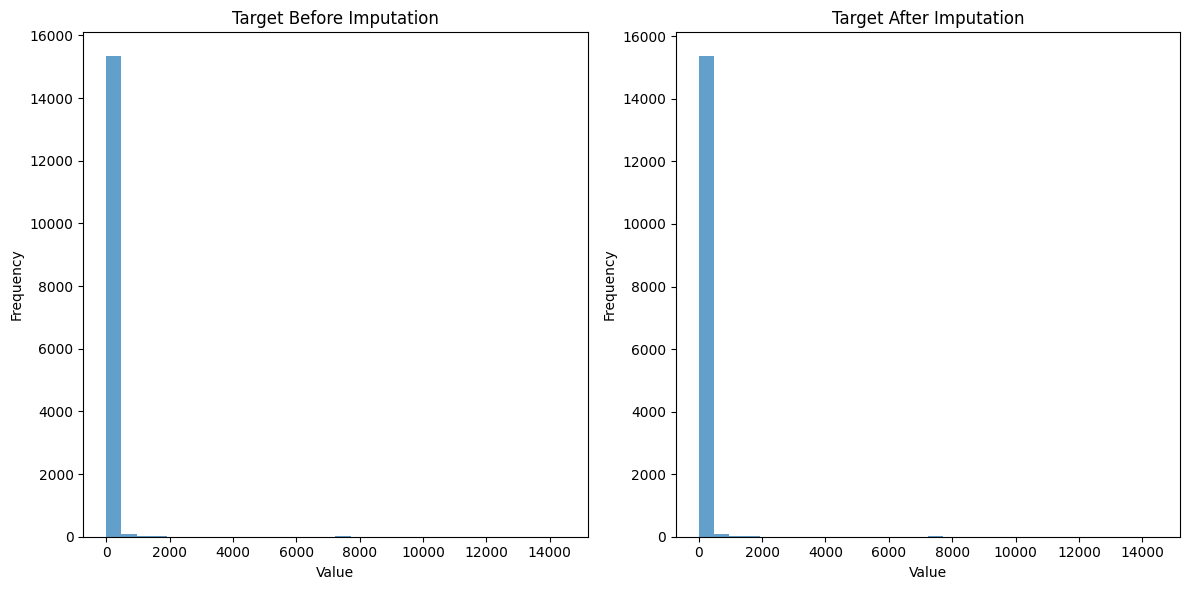

In [88]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# First, let's separate datetime and object columns from numerical ones
datetime_cols = ['end_of_period']
object_cols = ['file_name', 'ticker']
numeric_cols = [col for col in df.columns if col not in datetime_cols + object_cols]

# Create a copy of the numeric data for imputation
numeric_data = df[numeric_cols].copy()

# Initialize the MICE imputer
# Using RandomForestRegressor as the estimator often gives good results
mice_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    max_iter=10,
    random_state=42,
    verbose=2  # Set to 0 for no verbose output
)

# Fit and transform the data
imputed_numeric_data = mice_imputer.fit_transform(numeric_data)

# Create a new DataFrame with the imputed values
imputed_df = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Add back the non-numeric columns
for col in datetime_cols + object_cols:
    imputed_df[col] = df[col].values

# Verify the imputation results
print("Missing values before imputation:")
print(df[numeric_cols].isna().sum())

print("\nMissing values after imputation:")
print(imputed_df[numeric_cols].isna().sum())

# Optional: Visualize before and after imputation for a column with missing values
# For example, let's visualize 'target' which has 29 missing values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['target'].dropna(), bins=30, alpha=0.7)
plt.title('Target Before Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(imputed_df['target'], bins=30, alpha=0.7)
plt.title('Target After Imputation')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [90]:
imputed_df.isnull().sum()

total_assets                                0
non_current_assets                          0
current_assets                              0
property_plant_equipment                    0
intangible_assets                           0
inventories                                 0
trade_receivables                           0
cash_and_cash_equivalents                   0
equity_shareholders_of_the_parent           0
share_capital                               0
retained_earning_accumulated_losses         0
non_current_liabilities                     0
current_liabilities                         0
non_current_loans_and_borrowings            0
financial_liabilities_loans_borrowings      0
total_shares                                0
target                                      0
end_of_period                               0
file_name                                 412
ticker                                      0
dtype: int64

In [91]:
imputed_df.to_csv('filled_data.csv')